### Booking data of 3 Hotels/Resorts 

The dataset contains the following columns:
- Booking ID (unique)
- Property ID (1, 2 or 3)
- Booking Amount (self-explanatory)
- Check-In Date (self-explanatory)
- Check-Out Date (self-explanatory)
- Rooms Booked (self-explanatory)

Importing the libraries-

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('Booking Data.csv')
data.head()

,booking_id,property_id,booking_amount,check_in_date,check_out_date,rooms_booked
0,25641,2,19784,11/29/2019,12/1/2019,1
1,25642,1,40067,11/29/2019,12/4/2019,2
2,25643,3,35655,11/26/2019,11/29/2019,2
3,25644,2,10129,12/7/2019,12/9/2019,2
4,25645,3,30433,11/15/2019,11/18/2019,1


In [4]:
# Data types- 
data.dtypes

booking_id         int64
property_id        int64
booking_amount     int64
check_in_date     object
check_out_date    object
rooms_booked       int64
dtype: object

In [5]:
# Checking for NULL values - 
data.isnull().sum()

booking_id        0
property_id       0
booking_amount    0
check_in_date     1
check_out_date    7
rooms_booked      0
dtype: int64

In [6]:
# Finding the row with NULL in check in date- 
data[data.check_in_date.isnull()]

,booking_id,property_id,booking_amount,check_in_date,check_out_date,rooms_booked
12,25653,2,17679,NaN,1/1/1900,1


In [7]:
# Finding the row with NULL in check out date- 

In [8]:
# Finding the row with NULL in check out date- 
data[data.check_out_date.isnull()]

,booking_id,property_id,booking_amount,check_in_date,check_out_date,rooms_booked
26,25667,3,16885,12/4/2019,NaN,1
41,25682,1,28550,11/20/2019,NaN,1
49,25690,2,37021,11/18/2019,NaN,2
140,25781,1,10926,11/16/2019,NaN,2
155,25796,2,31455,11/25/2019,NaN,1
651,26292,2,31824,11/27/2019,NaN,1
672,26313,1,16528,11/13/2019,NaN,1


NULL values are present in the check in check out dates , it could be due to some reporting error. NULL in check-out values wont affect the current study, however NULL in check-in date would lead to a difference in total amount. 

### Converting Check_in_date and check_out_date features to Datetime- 

In [9]:
data['check_in_date']=pd.to_datetime(data.check_in_date, infer_datetime_format=True)
data['check_out_date']=pd.to_datetime(data.check_out_date, infer_datetime_format=True)

In [10]:
# First date present in the records
min(data.check_in_date).date()

datetime.date(2019, 11, 10)

In [11]:
# Last Check in date 
max(data.check_in_date).date()

datetime.date(2019, 12, 10)

Data collected from (2019, 11, 10) to (2019, 12, 10) exactly one month. 


#### Creating a feature for No of days for each booking (will be used for finding room tariff)- 

In [12]:
data['no_days']= (data['check_out_date'] - data['check_in_date']).apply(lambda x : x.days)

In [13]:
data.no_days.head(10)

0    2.0
1    5.0
2    3.0
3    2.0
4    3.0
5    2.0
6    2.0
7    2.0
8    3.0
9    3.0
Name: no_days, dtype: float64

In [14]:
data.no_days.isnull().sum()

8

We have total of 8 NULL values . Lets impute them with median.

In [15]:
data.no_days.fillna(data.no_days.median(),inplace = True)

#### Analysing booking_amount variable- 
It would be worthwhile to create a feature for Booking amount per room per day to get the tariff of room instead of analysing the entire booking amount.  

In [16]:
data['room_tariff'] = data['booking_amount']/data['rooms_booked']/data['no_days']

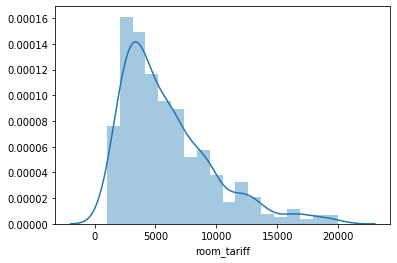

In [17]:
sns.distplot(data.room_tariff)

In [18]:
data.room_tariff.describe()

count      724.000000
mean      5963.419291
std       3732.340530
min       1015.400000
25%       3124.750000
50%       4912.437500
75%       7868.812500
max      20000.500000
Name: room_tariff, dtype: float64

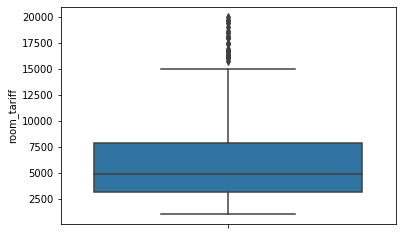

In [19]:
sns.boxplot(y=data.room_tariff)

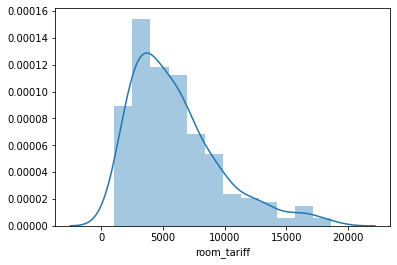

In [20]:
sns.distplot(data.groupby("property_id")['room_tariff'].get_group(3))

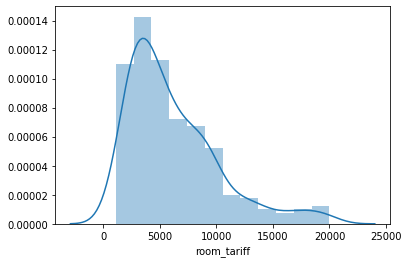

In [21]:
sns.distplot(data.groupby("property_id")['room_tariff'].get_group(2))

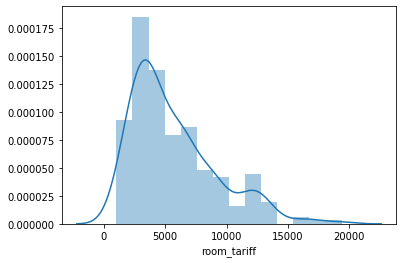

In [22]:
sns.distplot(data.groupby("property_id")['room_tariff'].get_group(1))

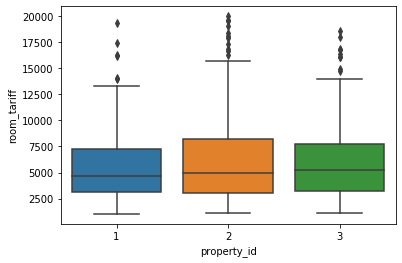

In [23]:
sns.boxplot(y=data.room_tariff,x=data.property_id)

In [24]:
pd.DataFrame({'Property 1':data.groupby('property_id').room_tariff.get_group(1).describe(),'Property 2':data.groupby('property_id').room_tariff.get_group(2).describe(),'Property 3':data.groupby('property_id').room_tariff.get_group(3).describe()})

,Property 1,Property 2,Property 3
count,239.000000,254.000000,231.000000
mean,5689.707566,6187.223261,6000.522727
std,3499.638082,4041.455879,3607.642897
min,1015.400000,1113.500000,1064.800000
25%,3146.525000,3077.025000,3222.650000
50%,4637.000000,4973.333333,5197.666667
75%,7235.433333,8220.250000,7715.000000
max,19370.000000,20000.500000,18587.500000


Inferences- 
1. As expected we observe positively skewed distribution for room tariff. Few rooms are tariffed higher hence they pull the mean towards the right. If not for these luxury rooms/suites , we would have obtained a normal distribution.   
2. All the properties have very similar summary statistics, it implies all three have similar kind of pricing. Min values are quite similar as well. Some difference is observed in Maximum room tariff  Property 2 > Property 3 > Property 1 .

### No booking id was involved in same day check outs (For eg Airport transfers)

In [57]:
data[data.check_in_date==data.check_out_date]

,booking_id,property_id,booking_amount,check_in_date,check_out_date,rooms_booked,amount_per_day


In [25]:
# Creating a list containing all the check in dates-
date=min(data.check_in_date).date()
date_series=[]
while date <= max(data.check_in_date).date() :
    
    date_series.append(date)
    date= date+datetime.timedelta(days=1)

In [26]:
date_series

[datetime.date(2019, 11, 10),
 datetime.date(2019, 11, 11),
 datetime.date(2019, 11, 12),
 datetime.date(2019, 11, 13),
 datetime.date(2019, 11, 14),
 datetime.date(2019, 11, 15),
 datetime.date(2019, 11, 16),
 datetime.date(2019, 11, 17),
 datetime.date(2019, 11, 18),
 datetime.date(2019, 11, 19),
 datetime.date(2019, 11, 20),
 datetime.date(2019, 11, 21),
 datetime.date(2019, 11, 22),
 datetime.date(2019, 11, 23),
 datetime.date(2019, 11, 24),
 datetime.date(2019, 11, 25),
 datetime.date(2019, 11, 26),
 datetime.date(2019, 11, 27),
 datetime.date(2019, 11, 28),
 datetime.date(2019, 11, 29),
 datetime.date(2019, 11, 30),
 datetime.date(2019, 12, 1),
 datetime.date(2019, 12, 2),
 datetime.date(2019, 12, 3),
 datetime.date(2019, 12, 4),
 datetime.date(2019, 12, 5),
 datetime.date(2019, 12, 6),
 datetime.date(2019, 12, 7),
 datetime.date(2019, 12, 8),
 datetime.date(2019, 12, 9),
 datetime.date(2019, 12, 10)]

In [27]:
# Total number of days we will be preparing the data frame for- 
len(date_series)

31

In [28]:
# Initialising the skeleton data frame- 
new_data=pd.DataFrame({'Date':pd.Series(date_series*3),'Property':[1,2,3]*len(date_series),'Amount Realized':0,'Rooms Occupied':0}).sort_values(by=['Date','Property'])

In [29]:
# reseting the index jumbled after the sort operation- 
new_data=new_data.reset_index(drop=True)

In [30]:
new_data.head()

,Date,Property,Amount Realized,Rooms Occupied
0,2019-11-10,1,0,0
1,2019-11-10,2,0,0
2,2019-11-10,3,0,0
3,2019-11-11,1,0,0
4,2019-11-11,2,0,0


In [31]:
new_data['Date']=pd.to_datetime(new_data.Date, infer_datetime_format=True)

In [32]:
new_data.dtypes

Date               datetime64[ns]
Property                    int64
Amount Realized             int64
Rooms Occupied              int64
dtype: object

In [33]:
# Loop to calculate Rooms Occupied for each date , and Amount realized
for i in new_data.index:
    try : 
        new_data.loc[i,'Rooms Occupied']= (data[(data.check_in_date <= new_data.loc[i,'Date']) &
            (data.check_out_date>new_data.loc[i,'Date'])].groupby('property_id')).get_group(new_data.loc[i,'Property']).rooms_booked.sum()
        new_data.loc[i,'Amount Realized']= data[(data.check_in_date==new_data.loc[i,'Date'])].groupby('property_id').get_group(new_data.loc[i,'Property']).booking_amount.sum()
    except KeyError:
        continue 

### Note- The booking amount for individual record is added to the Amount Realized feature on the check-in date itself. 

In [34]:
new_data.head()

,Date,Property,Amount Realized,Rooms Occupied
0,2019-11-10,1,301891,18
1,2019-11-10,2,237822,14
2,2019-11-10,3,126747,12
3,2019-11-11,1,319893,32
4,2019-11-11,2,299720,28


### Sanity Checks- 

In [35]:
new_data['Amount Realized'].sum() - data.booking_amount.sum()

-17679

#### This difference is due to the erreneous row value which has NULL in the check in date feature and check out date. 

In [36]:
# Has to be less than 60-
new_data['Rooms Occupied'].max()

56

In [37]:
new_data['Rooms Occupied'].min()

12

#### No anomalies present!! 

### Making a line plot for comparing the three properties in terms of occupancy -  

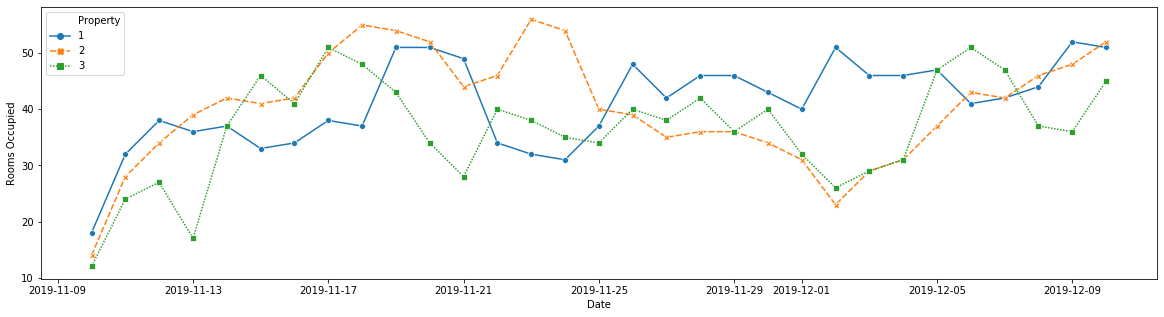

In [40]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date',y='Rooms Occupied',data=new_data,style='Property',markers=True,hue='Property',palette=['C0','C1','C2'])
plt.show()

In [39]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Making a line plot for comparing the three properties in terms of Amount Realized -  

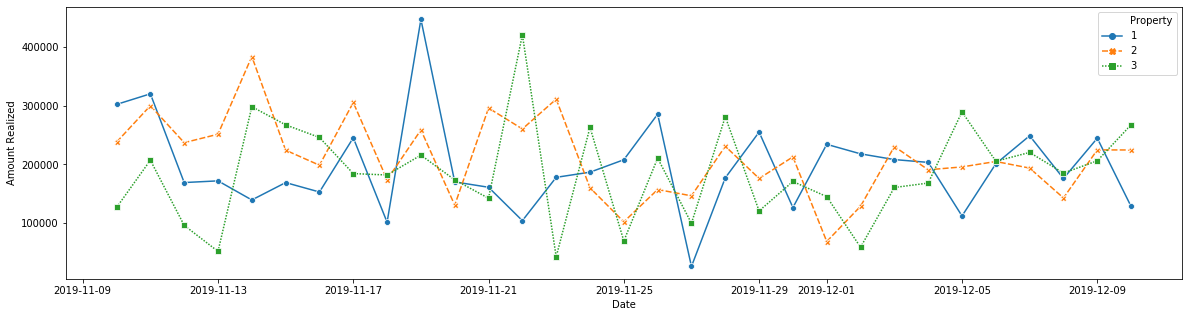

In [41]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Date',y='Amount Realized',data=new_data,style='Property',markers=True,hue='Property',palette=['C0','C1','C2'])
plt.show()

### Inferences- 

### i) Property 3 has the least Amount Realized i.e least business. 

In [42]:
new_data.groupby('Property')['Amount Realized'].sum().sort_values()

Property
3    5777145
1    6070944
2    6557854
Name: Amount Realized, dtype: int64

### ii) Property 3 has the least value of Rooms Occupied as well. 

In [43]:
new_data.groupby('Property')['Rooms Occupied'].sum().sort_values()

Property
3    1132
2    1253
1    1273
Name: Rooms Occupied, dtype: int64

In [44]:
new_data.groupby('Property')['Rooms Occupied'].describe().T

Property,1,2,3
count,31.000000,31.000000,31.000000
mean,41.064516,40.419355,36.516129
std,7.809974,9.935707,9.312611
min,18.000000,14.000000,12.000000
25%,36.500000,34.500000,31.500000
50%,42.000000,41.000000,37.000000
75%,46.500000,47.000000,42.500000
max,52.000000,56.000000,51.000000


#### iii) Property 3 has the lowest 'Average Rooms Occupied' .
     
####       Property 3 has the least value of 'min Occupied Rooms'
     
####       Property 3 has the lower values of Quantile values as well ( Clearly visible in the box plot)

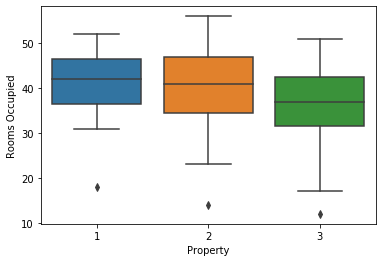

In [45]:
sns.boxplot(x='Property',y='Rooms Occupied',data=new_data)

As per the analysis presented above, it can be concluded that property 3 is the least profitable among the three properties and necessary steps should be taken to identify the possible causes and provide recomendations.  

Time series forecasting could be done to make predictions about coming months, but the given data is of only 31 days hence we will not get significant results.